In [1]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

## Verifying Packages & Versions
print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.7.4 (default, Sep  7 2019, 18:27:02) 
[Clang 10.0.1 (clang-1001.0.46.4)]
Numpy: 1.16.0
Pandas: 0.24.0
Matplotlib: 3.0.2
Seaborn: 0.9.0
Scipy: 1.2.0
Sklearn: 0.20.2


In [2]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read CSV file that contains credit card information using pandas
dataset = pd.read_csv('https://s3-us-west-2.amazonaws.com/strikedataset/creditcard.csv')

In [4]:
# Check total number of records in the file
print(dataset.shape) # This will output a tuple with (total_records_count, total_columns_count)

(284807, 31)


In [5]:
# exploring the details [This may take some time due to the amount of data]
print(dataset.columns) 

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
# Let`s describe the data
print(dataset.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [7]:
# From the class output mean value it tells us that we have a lot more valid transactions 
# as compared to Fraud transactions
# Lets work on 10% of dataset to save computation time/effort.
dataset = dataset.sample(frac=0.1, random_state=1)

In [8]:
print(dataset.shape)

(28481, 31)


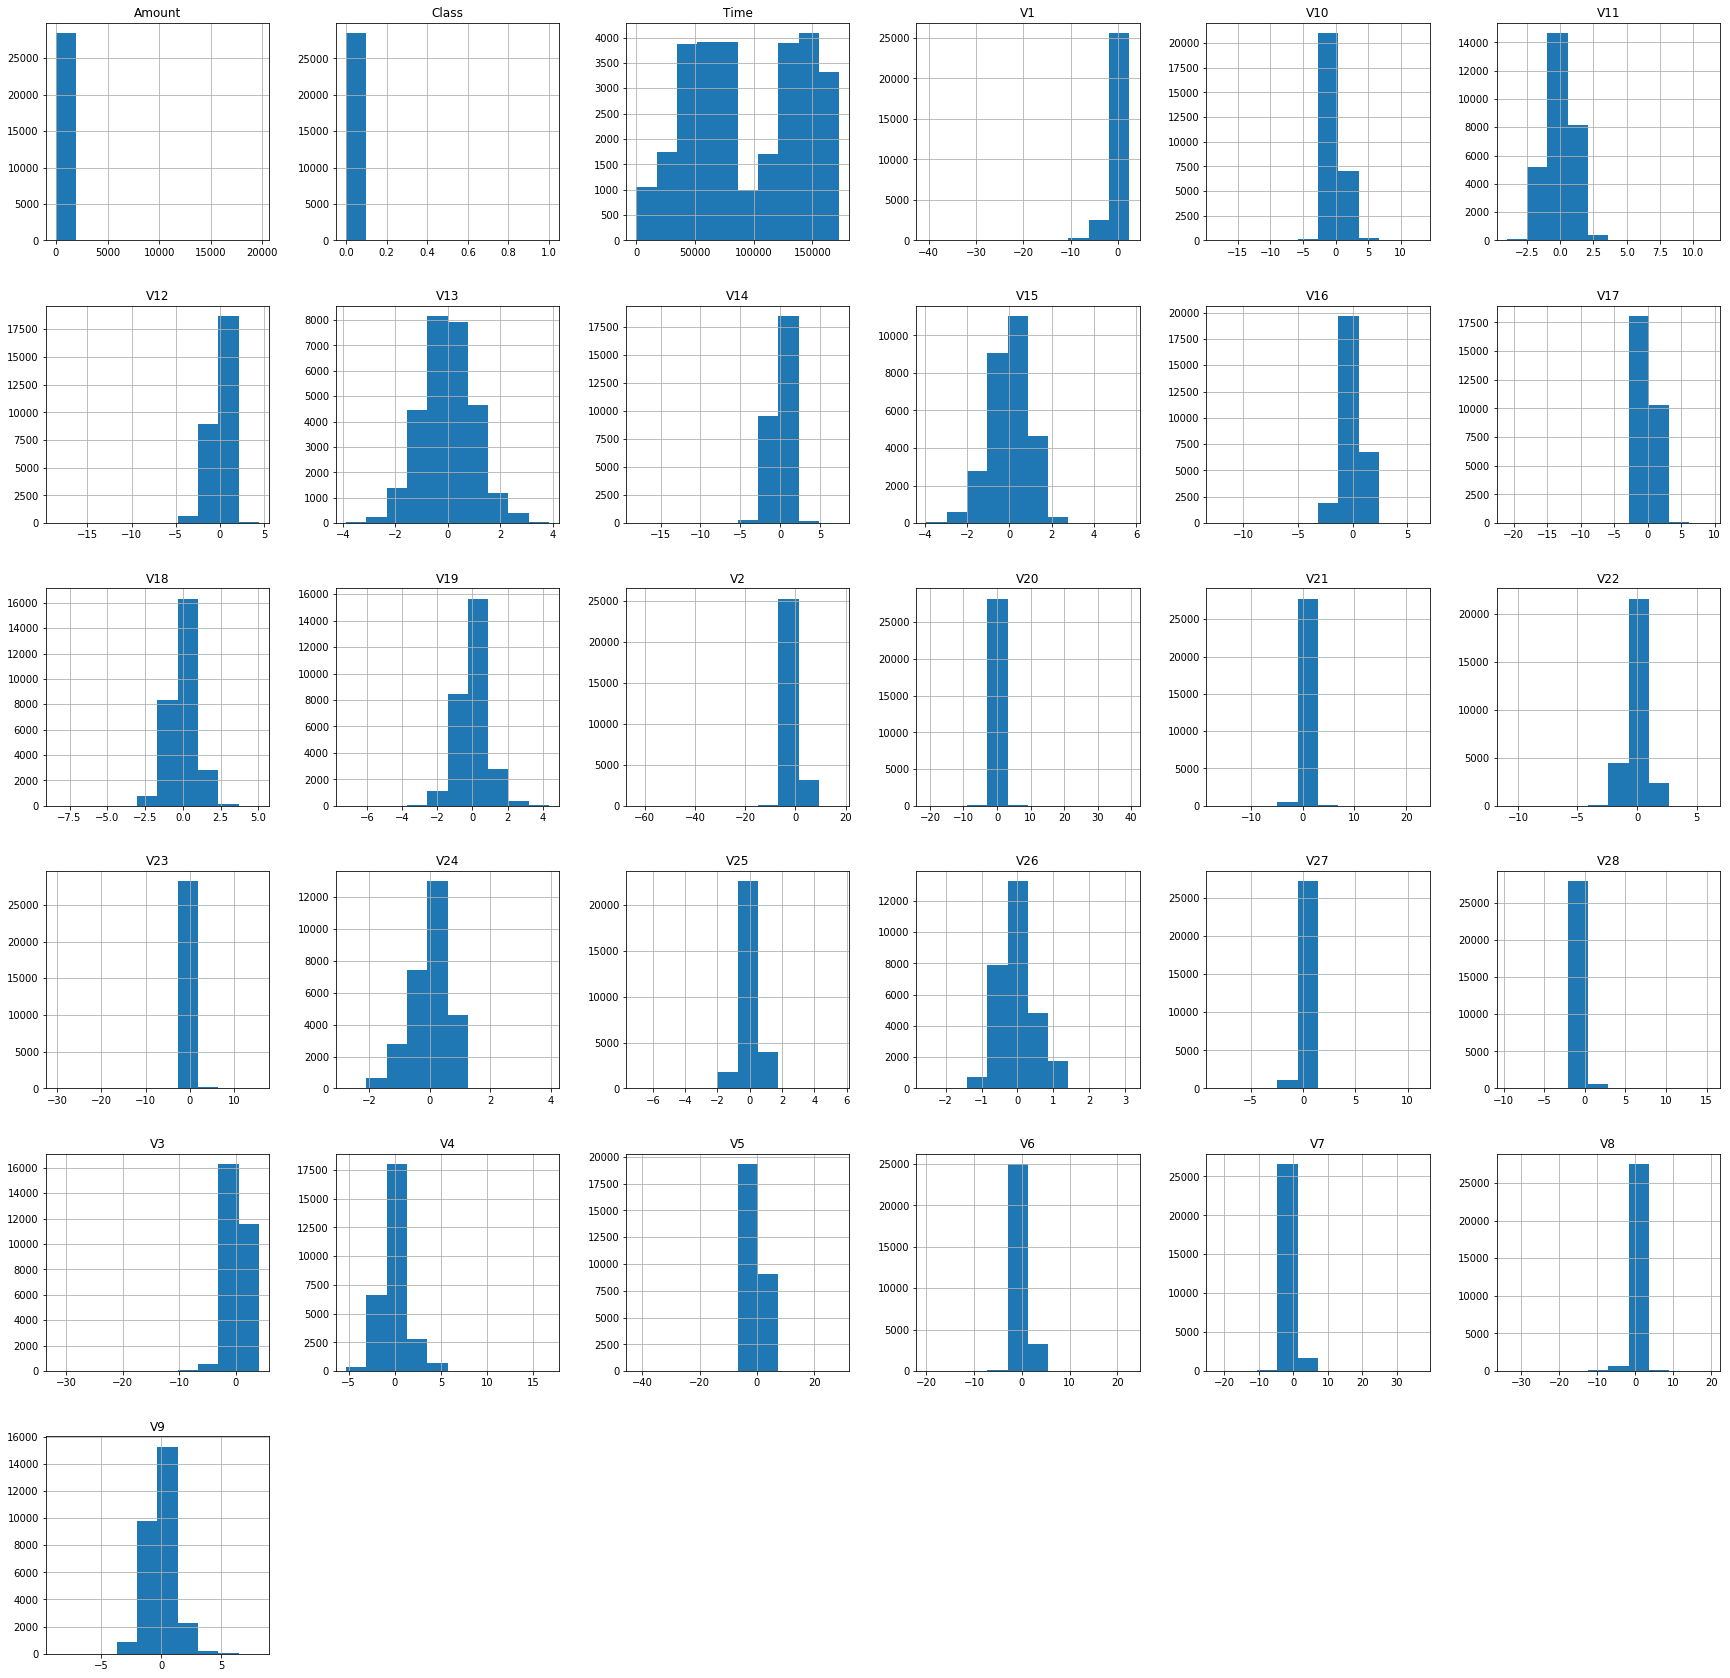

In [9]:
# Plot Histogram
dataset.hist(figsize = (30, 30))
plt.show()

In [10]:
# Here you can see very few Fraud Transactions as compared to Valid Transactions
Fraud = dataset[dataset['Class'] == 1]
Valid = dataset[dataset['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print("OUTLIER_FRACTION : %s " %(outlier_fraction))

OUTLIER_FRACTION : 0.0017234102419808666 


In [11]:
# Print Both Fraud and Valid Cases Individually [Remember this is the count from only 10% total data]
print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))

Fraud Cases: 49
Valid Cases: 28432


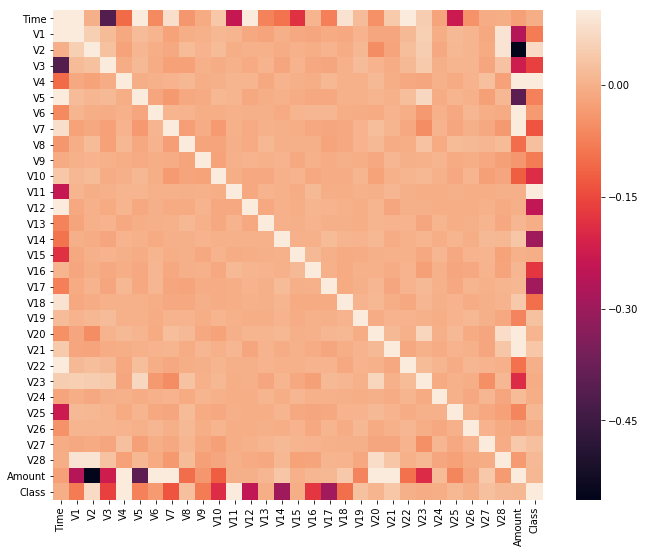

In [12]:
# Correlation Matrix with Heat Map.
corrmat = dataset.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=.10, square=True)
plt.show()

In [13]:
# Get all columns from the dataframe.
columns = dataset.columns.tolist()

# Filtering the data from the dataset that we don`t want.
columns = [c for c in columns if c not in ["Class"]]

# Store variables we`ll be predicting on
target = "Class"

X = dataset[columns]
Y = dataset[target]

# Print shapes of X & Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [14]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [15]:
# Defining a Random state
state = 1

# Defining a outlier detection method
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X), contamination=outlier_fraction,random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, contamination=outlier_fraction)
}

In [16]:
# Fit the model
n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_predict = clf.fit_predict(X)
        scores_predict = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_predict = clf.decision_function(X)
        y_predict = clf.predict(X)
        
    #Reshape the prediction values to 0 for valid, 1 for fraud
    y_predict[y_predict == 1] = 0
    y_predict[y_predict == -1] = -1
    
    n_errors = (y_predict != Y).sum()
    
    #Run classifier metrics
    print('{}:{}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_predict))
    print(classification_report(Y, y_predict))

/Users/pocuser/Desktop/PROJECTS/strike/Strike/env/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/Users/pocuser/Desktop/PROJECTS/strike/Strike/env/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest:85
0.9970155542291352
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      1.00      1.00     28432
           1       0.00      0.00      0.00        49

   micro avg       1.00      1.00      1.00     28481
   macro avg       0.33      0.33      0.33     28481
weighted avg       1.00      1.00      1.00     28481



/Users/pocuser/Desktop/PROJECTS/strike/Strike/env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/pocuser/Desktop/PROJECTS/strike/Strike/env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Local Outlier Factor:98
0.9965591095818265
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      1.00      1.00     28432
           1       0.00      0.00      0.00        49

   micro avg       1.00      1.00      1.00     28481
   macro avg       0.33      0.33      0.33     28481
weighted avg       1.00      1.00      1.00     28481



/Users/pocuser/Desktop/PROJECTS/strike/Strike/env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/pocuser/Desktop/PROJECTS/strike/Strike/env/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
